In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import json

In [2]:
datset_path = "C:/Users/Hp/Desktop/Classes/CNN_classification/DataSet"

train_data_path = os.path.join(datset_path,'training')
test_data_path = os.path.join(datset_path,'test')

## Processing Training data


In [125]:
class_labels=[]
features=[]
WIDTH=HEIGHT=64

for file in os.listdir(train_data_path):
    img_path=os.path.join(train_data_path,file)
    current_label=file
    for img in os.listdir(img_path):
        image = plt.imread(os.path.join(img_path,img))
        class_labels.append(current_label)
        img = image.reshape([WIDTH, HEIGHT, 3])
        features.append(img)

In [126]:
x_train=np.array(features)
targetNames=np.unique(class_labels)
le=LabelEncoder()
y_train=le.fit_transform(class_labels)

In [127]:
print("Shape of x_train: ",np.shape(x_train))
print("Shape of y_train: ",np.shape(y_train))

Shape of x_train:  (5875, 64, 64, 3)
Shape of y_train:  (5875,)


In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

In [141]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)

In [142]:
print("Shape of x_train: ",np.shape(X_train))
print("Shape of y_train: ",np.shape(Y_train))


print("Shape of X_test: ",np.shape(X_test))
print("Shape of y_test: ",np.shape(Y_test))

Shape of x_train:  (4112, 64, 64, 3)
Shape of y_train:  (4112,)
Shape of X_test:  (1763, 64, 64, 3)
Shape of y_test:  (1763,)


## Training the model

In [143]:
cnn = models.Sequential([
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [144]:
cnn.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 62, 62, 128)       3584      
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 29, 29, 64)        73792     
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 12, 12, 32)        18464     
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 4, 4, 16)        

In [145]:
cnn.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history=cnn.fit(X_train, Y_train, validation_data=(X_test,Y_test),epochs=10)

Epoch 1/10
129/129 [==============================] - 8s 56ms/step - loss: 0.9218 - accuracy: 0.7291 - val_loss: 0.4298 - val_accuracy: 0.8100
Epoch 2/10
129/129 [==============================] - 4s 32ms/step - loss: 0.3253 - accuracy: 0.8750 - val_loss: 0.2371 - val_accuracy: 0.9126
Epoch 3/10
129/129 [==============================] - 6s 50ms/step - loss: 0.2123 - accuracy: 0.9214 - val_loss: 0.2079 - val_accuracy: 0.9314
Epoch 4/10
129/129 [==============================] - 7s 53ms/step - loss: 0.1911 - accuracy: 0.9356 - val_loss: 0.1870 - val_accuracy: 0.9450
Epoch 5/10
129/129 [==============================] - 5s 36ms/step - loss: 0.2017 - accuracy: 0.9321 - val_loss: 0.1683 - val_accuracy: 0.9410
Epoch 6/10
129/129 [==============================] - 5s 36ms/step - loss: 0.1574 - accuracy: 0.9446 - val_loss: 0.1651 - val_accuracy: 0.9416
Epoch 7/10
129/129 [==============================] - 5s 37ms/step - loss: 0.1499 - accuracy: 0.9499 - val_loss: 0.1575 - val_accuracy: 0.9478

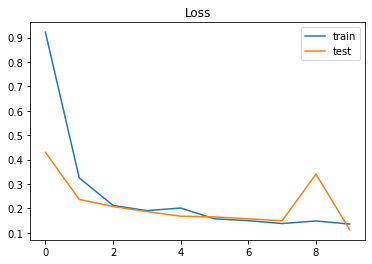

In [146]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()          

In [147]:
test_images = []

for img in os.listdir(test_data_path):
    test_image = plt.imread(os.path.join(test_data_path,img))
    test_images.append(test_image.reshape([WIDTH, HEIGHT, 3]))
test_images = np.array(test_images)

In [148]:
final_preds=[]
model_predictions = cnn.predict(test_images)

for i in model_predictions:
    if(i >= 1):
        final_preds.append(1)
    else:
        final_preds.append(0)


## Model accuracy

In [101]:
def model_accuracy(final_preds):
    manual_preds=[1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,
                 1,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0]
    return sum(1 for x,y in zip(manual_preds,final_preds) if x == y) / float(len(final_preds))

In [149]:
model_accuracy(final_preds) 

0.5408163265306123

## Results to Json file

In [ ]:
dictio={}
for i,j in enumerate(os.listdir(test_data_path)):
    dictio[j] = result[i]

In [ ]:
def write_json(filename, result):
    with open(filename, 'w') as outfile:
        json.dump(result, outfile)

def generate_sample_file(filename):
    write_json(filename, dictio)


generate_sample_file('./result.json')